In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('./data/india_housing_prices.csv')
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [55]:
print(df.columns)

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

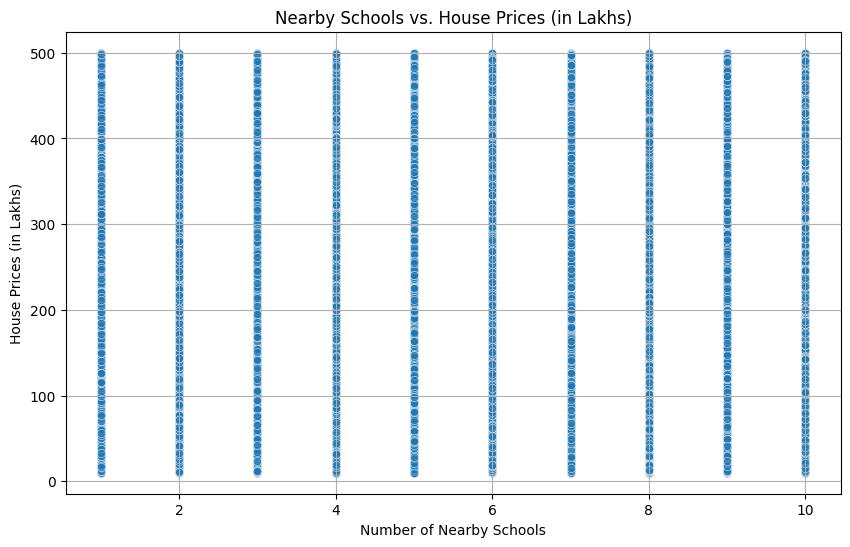

In [57]:
# 데이터 전처리: 결측값 제거
housing_data_cleaned = df.dropna(subset=['Price_in_Lakhs', 'Nearby_Schools'])

# 산점도 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data_cleaned, x='Nearby_Schools', y='Price_in_Lakhs', alpha=0.7)
plt.title('Nearby Schools vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby Schools')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()

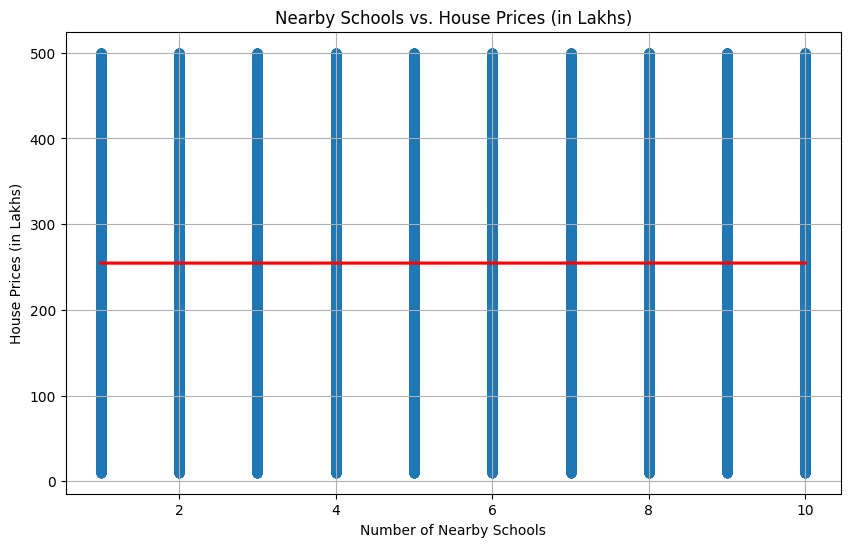

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 카테고리 열 정의
categories = ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
              'Public_Transport_Accessibility', 'Parking_Space', 'Security',
              'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

# 라벨 인코딩 함수 정의
def encode_feature(df):
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    return df

# 데이터 불러오기
file_path = './data/india_housing_prices.csv'
housing_data = pd.read_csv(file_path)

# 라벨 인코딩 적용
housing_data_encoded = encode_feature(housing_data)

# 데이터 전처리: 결측값 제거
housing_data_cleaned = housing_data_encoded.dropna(subset=['Price_in_Lakhs', 'Nearby_Schools'])

# 산점도와 선형 회귀선 생성
plt.figure(figsize=(10, 6))
sns.regplot(data=housing_data_cleaned, x='Nearby_Schools', y='Price_in_Lakhs', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Nearby Schools vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby Schools')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()


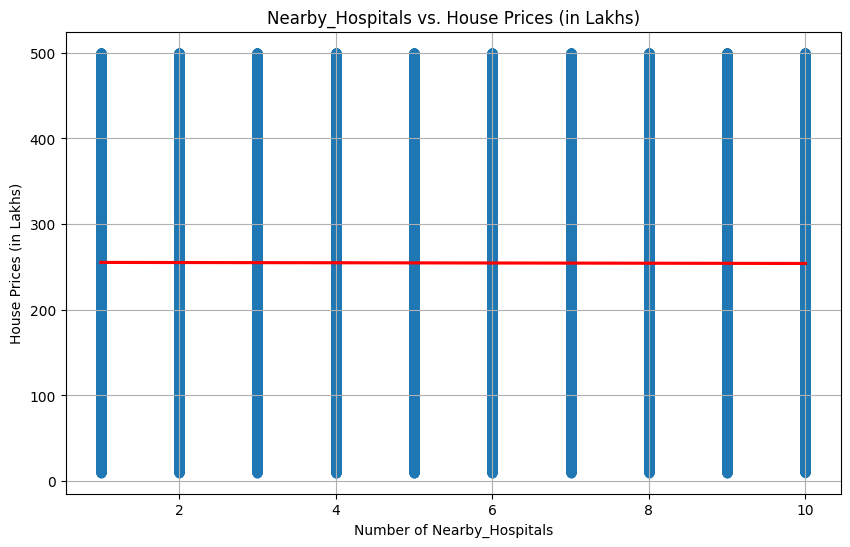

In [59]:
# 산점도와 선형 회귀선 생성
plt.figure(figsize=(10, 6))
sns.regplot(data=housing_data_cleaned, x='Nearby_Hospitals', y='Price_in_Lakhs', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Nearby_Hospitals vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby_Hospitals')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()


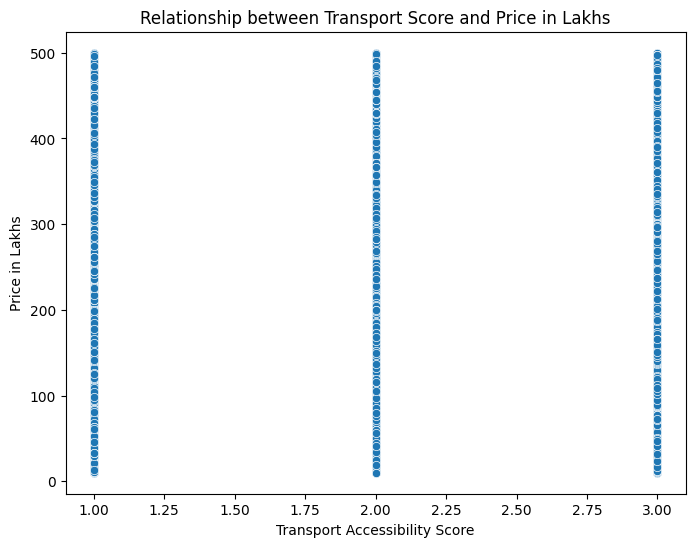

In [60]:
# Public_Transport_Accessibility 값을 점수로 변환
score_map = {'High': 3, 'Medium': 2, 'Low': 1}
df['Transport_Score'] = df['Public_Transport_Accessibility'].map(score_map)

# 가격과 점수 간의 관계를 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Transport_Score', y='Price_in_Lakhs', data=df)
plt.title('Relationship between Transport Score and Price in Lakhs')
plt.xlabel('Transport Accessibility Score')
plt.ylabel('Price in Lakhs')
plt.show()

In [61]:
print(df.columns)

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status', 'Transport_Score'],
      dtype='object')


In [4]:
# Parking_Space의 여부에 따른 Price_in_Lakhs 값 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parking_Space', y='Price_in_Lakhs', data=df)
plt.title('Price in Lakhs by Parking Space Availability')
plt.xlabel('Parking Space')
plt.ylabel('Price in Lakhs')
plt.show()

NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

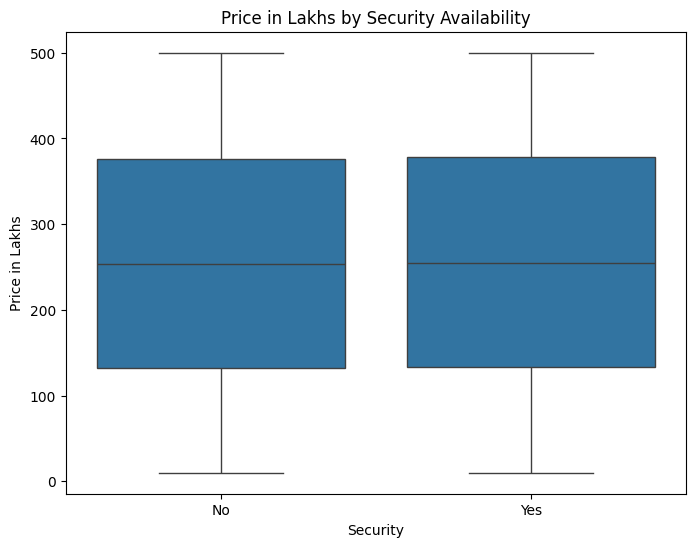

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Security', y='Price_in_Lakhs', data=df)
plt.title('Price in Lakhs by Security Availability')
plt.xlabel('Security')
plt.ylabel('Price in Lakhs')
plt.show()

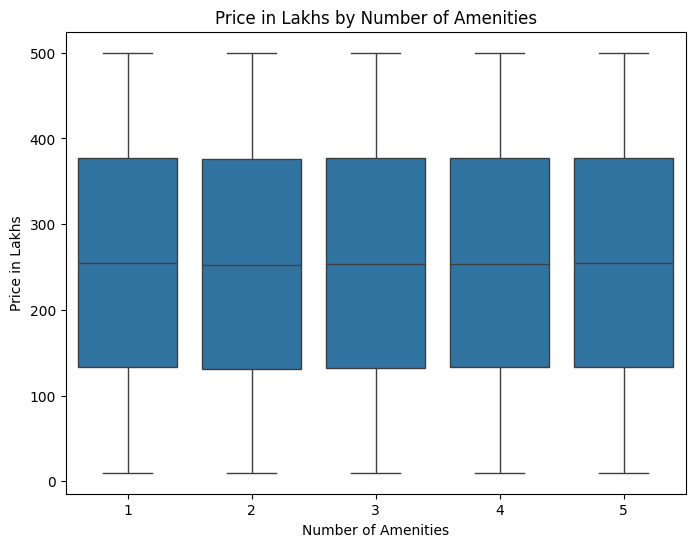

In [65]:
df['Amenities_Count'] = df['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Amenities 항목 개수에 따른 Price_in_Lakhs 값 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amenities_Count', y='Price_in_Lakhs', data=df)
plt.title('Price in Lakhs by Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Price in Lakhs')
plt.show()

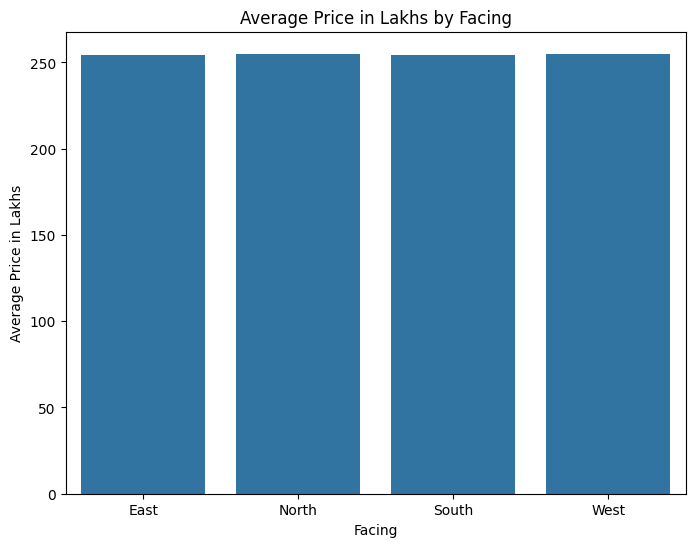

In [66]:
facing_price_avg = df.groupby('Facing')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Facing', y='Price_in_Lakhs', data=facing_price_avg)
plt.title('Average Price in Lakhs by Facing')
plt.xlabel('Facing')
plt.ylabel('Average Price in Lakhs')
plt.show()

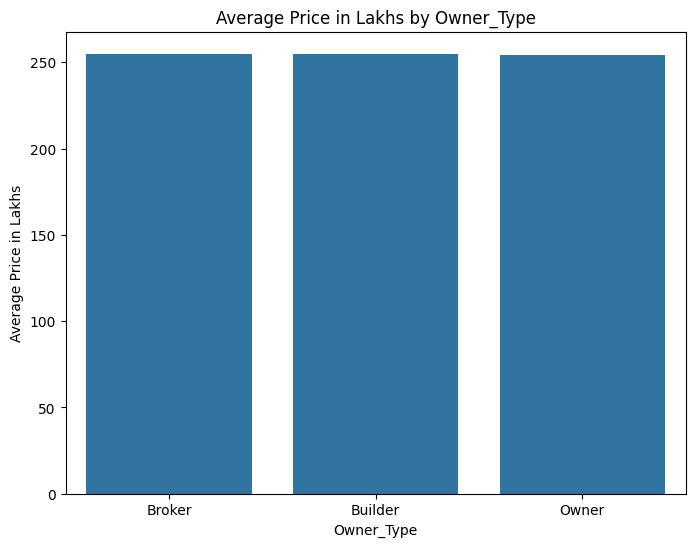

In [67]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Owner_Type_price_avg = df.groupby('Owner_Type')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Owner_Type', y='Price_in_Lakhs', data=Owner_Type_price_avg)
plt.title('Average Price in Lakhs by Owner_Type')
plt.xlabel('Owner_Type')
plt.ylabel('Average Price in Lakhs')
plt.show()

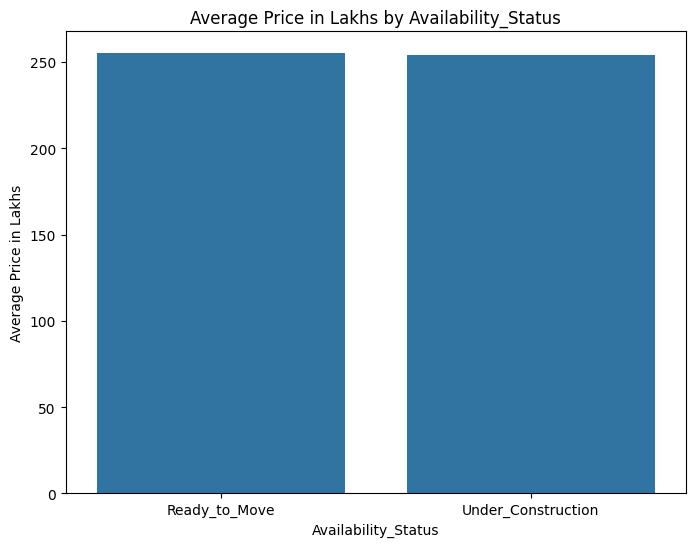

In [68]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Availability_Status_price_avg = df.groupby('Availability_Status')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Availability_Status', y='Price_in_Lakhs', data=Availability_Status_price_avg)
plt.title('Average Price in Lakhs by Availability_Status')
plt.xlabel('Availability_Status')
plt.ylabel('Average Price in Lakhs')
plt.show()

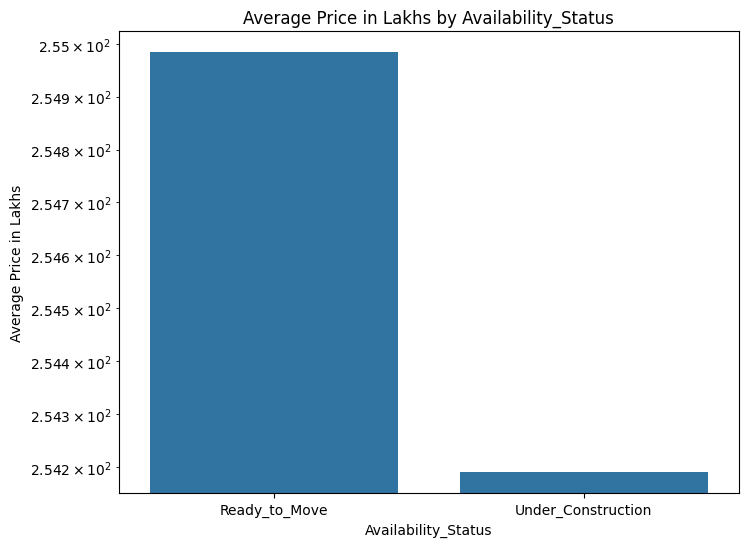

In [82]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Availability_Status_price_avg = df.groupby('Availability_Status')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Availability_Status', y='Price_in_Lakhs', data=Availability_Status_price_avg)
plt.title('Average Price in Lakhs by Availability_Status')
plt.xlabel('Availability_Status')
plt.ylabel('Average Price in Lakhs')

# y축을 로그 스케일로 설정
plt.yscale('log')

plt.show()


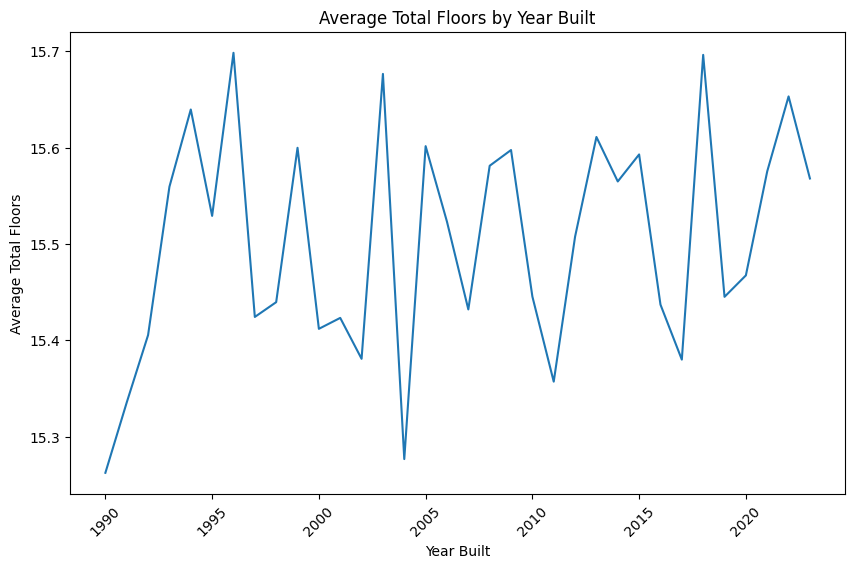

In [69]:
# Year_Built에 따른 Total_Floors 평균 계산
year_built_floors_avg = df.groupby('Year_Built')['Total_Floors'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year_Built', y='Total_Floors', data=year_built_floors_avg)
plt.title('Average Total Floors by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Total Floors')
plt.xticks(rotation=45)
plt.show()

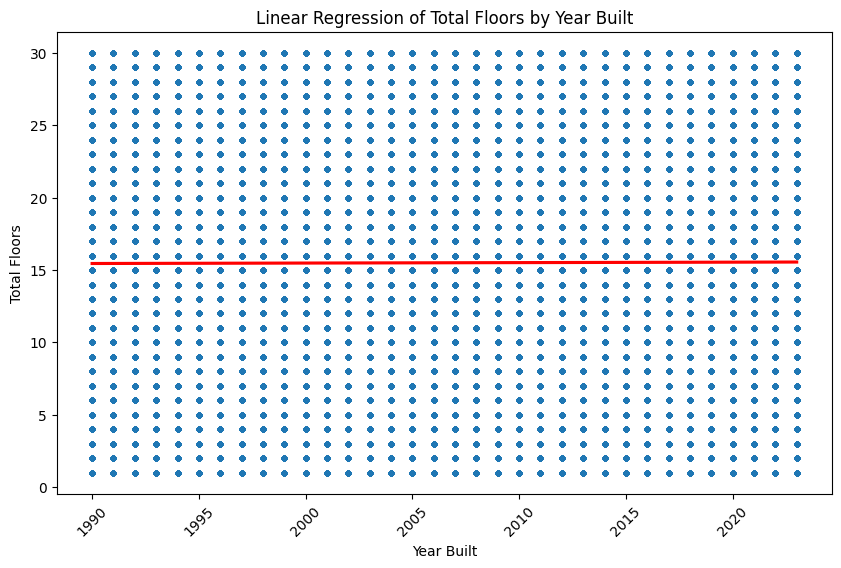

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year_Built', y='Total_Floors', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Regression of Total Floors by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Total Floors')
plt.xticks(rotation=45)
plt.show()